# Writing to and Reading from files

After executing the M-file script `solar_heating1.m`, only the very last values of the variables `myTime` and `temperature` are retained in the workspace. It is desirable to save all their values to a text file, such that they can be later read and analyzed (e.g., plotted using a separate M-file script `plot_results.m`).

## Saving variables to a text file

Using the following commands, a text file can be opened, data can be written to it, and finally the filed can be closed again:

| Command | Action|
| :- | :- |
| `fopen` | open a file for output |
| `fprintf` | write formatted data to an *open* file |
| `fclose` | close an open file |

### Opening a text file
The syntax for opening a text file is:

`fileID = fopen(filename, mode)`

Here `fileID` is a variable that in the remainder of the M-file serves to identify the file to be opened.

| Value | meaning|
| :- | :- |
| `r` | open a file for *reading* (this is the default) |
| `w` | open an existing file or create a new file for *writing* |
|     | (discard existing contents))
| `a` | open an existing file or create a new file, |
|     | *appending* data to existing contents to the end of the file |

In [2]:
% Set physical constants
pureWaterFreezingPoint  = 273.15;  % pure water freezing point/K

% Set run parameters
deltaT     =    5.0*86400.0;       % time step/s
startTime  =    0.0;               % time to start integration/s
nTimeSteps =  365;                 % total number of time steps

% Set model parameters
solarConstant         = 1360.8;    % solar constant/(W m-2)
effectiveHeatCapacity = 2.9526E08; % effective heat capacity of the 
                                   % atmosphere-ocean system/(J m-2 K-1)
                                   
% Set initial conditions
temperature = 15.0 + pureWaterFreezingPoint;
myTime      = startTime;

% Open output file
fileID = fopen('results.txt', 'w');

% Write header of output file
fprintf(fileID, '%% Zero-dimensional global solar heating model\n');
fprintf(fileID, '%% Column 1: time/a\n');
fprintf(fileID, '%% Column 2: global annual-mean surface temperature/degC\n');
fprintf(fileID, '%10.4f %10.4f\n', myTime/(86400.0*365.0), ...
                                   temperature - pureWaterFreezingPoint);
 
% Time loop (myIter = iteration counter)
for myIter=1:nTimeSteps
    
    % Record simulated time
    myTime = myTime + deltaT;
    
    % Step global annual-mean surface temperature forward in time 
    % (by "Euler forward" or "forward-in-time" method)
    temperature  = temperature + deltaT/effectiveHeatCapacity* ...
                                 (solarConstant/4.0);
    
    % Write current time and temperature to output file
    fprintf(fileID, '%10.4f %10.4f\n', myTime/(86400.0*365.0), ...
                                       temperature - pureWaterFreezingPoint);
    
end % end of time loop

% Close output file
fclose(fileID);

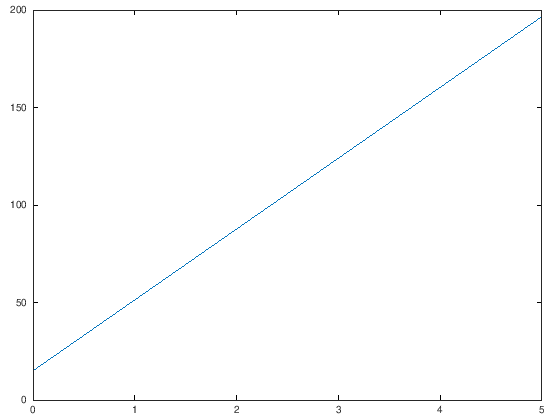

In [3]:
% Open text file and load data
filename    = 'results.txt';
data        = load(filename);
time        = data(:, 1); % column 1: time/a
temperature = data(:, 2); % column 2: temperature/degC

% Plot the global annual-mean surface temperature as a function of time
plot(time, temperature, 'LineWidth', 2);